In [29]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 99

## Initial Exploration

In [30]:
preview = pd.read_csv('loans_2007.csv', nrows=5)
preview

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


By looking at the first 5 rows, there are a number of quility issues that can be addressed, as well as optimizations to datatypes that can be made. 
- The `title` column has inconsistent capitalization
- The `term` column can be converted to an integer number of months
- Several columns of floats can be converted to integers.
- The `emp_title` column has some missing data in the form of NaN

Let's split the dataset into chunks and evaluate the size of each one. We can do this by making a histogram of the distribution of chunk sizes in MB. For this exercise, I am limiting my theoretical memory to 10MB. This means the chunk sizes should be about 5MB each. By setting a chunk size of 3000, we are able to achieve this. 

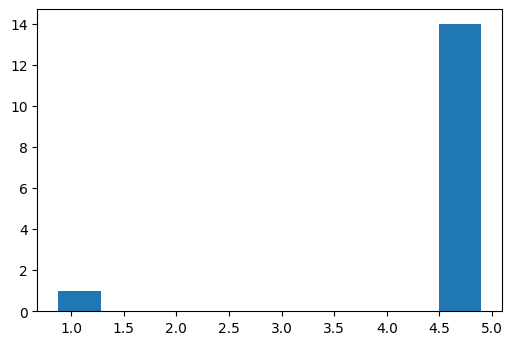

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
memory_footprints = []

chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)
for chunk in chunk_iter:
    memory_footprints.append(chunk.memory_usage(deep=True).sum()/(1024*1024))
fig = plt.hist(memory_footprints)

Let's see how many numeric and string columns there are.

In [35]:
numeric = []
string = []
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)
for chunk in chunk_iter:
    numeric.append(chunk.select_dtypes(include=[np.number]).shape[1])
    string.append(chunk.select_dtypes(include=['object']).shape[1])
print(numeric)
print(string)

[31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30]
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22]


For each chunk, there are approximately 31 numeric columns, and 21 string columns, however these are not consistent throughout the dataset. 